In [6]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# ground truth model
N, R = 20, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [8]:
als_results = tt.fit_ensemble(data, range(1,9), replicates=10, tol=1e-6)
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.6789, max error = 0.8757, mean error = 0.7183, time to fit = 0.0648s
Optimizing rank-2 models.
   10/10 converged, min error = 0.4762, max error = 0.4906, mean error = 0.4820, time to fit = 0.0689s
Optimizing rank-3 models.
   10/10 converged, min error = 0.0705, max error = 0.4899, mean error = 0.1125, time to fit = 0.2618s
Optimizing rank-4 models.
   10/10 converged, min error = 0.0702, max error = 0.0704, mean error = 0.0703, time to fit = 0.2322s
Optimizing rank-5 models.
   10/10 converged, min error = 0.0700, max error = 0.0702, mean error = 0.0701, time to fit = 0.2871s
Optimizing rank-6 models.
   10/10 converged, min error = 0.0694, max error = 0.0699, mean error = 0.0698, time to fit = 0.4330s
Optimizing rank-7 models.
   10/10 converged, min error = 0.0690, max error = 0.0697, mean error = 0.0695, time to fit = 0.6389s
Optimizing rank-8 models.
   10/10 converged, min error = 0.0685, max error = 0.0693, mean error 

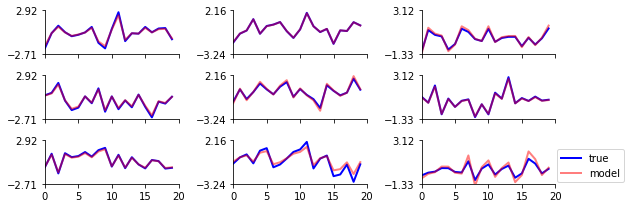

In [9]:
fig, axes, plot_obj = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);
axes[-1,-1].legend(('true', 'model'), bbox_to_anchor=[0,0,1.55,0.9])

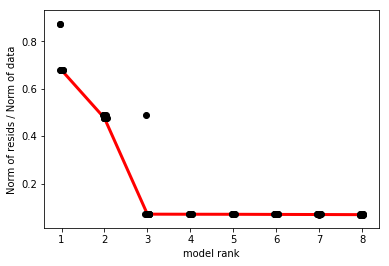

In [10]:
ax = tt.plot_error(als_results, scatter_kw=dict(c='k'), line_kw=dict(c='r', lw=3, zorder=0));